### CIFAR-10 - Object Recognition in Images

#### Objective

This is an old competition from [kaggle](https://www.kaggle.com/competitions/cifar-10).


The CIFAR-10 data consists of 60,000 32x32 color images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images in the official data. 


- **train.7z**- a folder containing the training images in png format 
- **test.7z** - a folder containing the test images in png format
- **trainLabels.csv** - the training labels

**Note: In our case, we will be taking this data directly using *cifar10.load_data()* from *keras.datasets*.**


The label classes in the dataset are:
- airplane 
- automobile 
- bird 
- cat 
- deer 
- dog 
- frog 
- horse 
- ship 
- truck


The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

#### Outline of the models used:
In our project, we have trained the dataset using the following models and compared their performance:-

- Simple Dense Model
- CNN Model
- VGG16 Model
- VGG19 Model
- RestNet50 Model
- Yolo v8 Model
  
Each Model is trained till `15Epochs`. Moreover, comparison between the behaviour of `Train` and `Validation` Accuracies and `Losses` on each epoch for each of our `Model` has been made.

##### *Importing all the libraries that we will be requiring during our project*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import tensorflow as tf
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import RMSprop
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Loading our dataset from the Keras Datasets

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 141s 1us/step


In [3]:
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_test.shape))

print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

print("Unique Classes in our dataset: {}".format(np.unique(y_train)))
print("Number of Classes we have in our dataset: {}".format(len(np.unique(y_train))))

Shape of X_train: (50000, 32, 32, 3)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of y_test: (10000, 1)
Unique Classes in our dataset: [0 1 2 3 4 5 6 7 8 9]
Number of Classes we have in our dataset: 10


#### Looking randomly at a few of the images

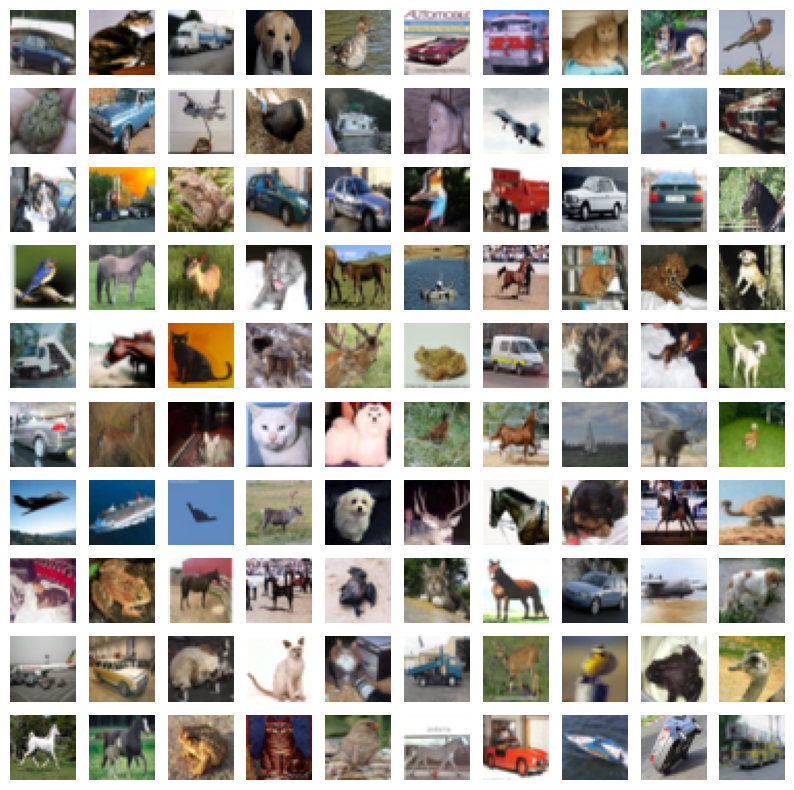

In [4]:
random_indices = random.sample(range(50000), 100)

plt.figure(figsize = (10, 10))


for i, idx in enumerate(random_indices):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X_train[idx])
    plt.axis('off')

plt.show()